## **Single Variable Linear Regression using Gradient Descent**


This practical work demonstrates how to implement linear regression using gradient descent in Python. The tasks include initializing parameters, iterating through data points to minimize the cost function, and visualizing the results. Here is a step-by-step explanation with the complete code implementation:


#### **Import Necessary Libraries**


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-darkgrid")

#### **Load the Data**


In [ ]:
data = pd.read_csv("./Data/Single_Variable_LR_Data.csv")

In [42]:
data.head()

,x1,y
0,2.9,4.0
1,6.7,7.4
2,4.9,5.0
3,7.9,7.2
4,9.8,7.9


In [43]:
data.shape

(13, 2)

#### **Define Variables 𝑋 and 𝑦**


**Assign first column data to X and second column to y**

<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)


In [44]:
# assign the first column to X
X = data.drop("y", axis=1).values.ravel()

# assign the second column to y
y = data["y"].values

#### **Explore Data**


In [45]:
X

array([2.9000001 , 6.69999981, 4.9000001 , 7.9000001 , 9.80000019,
       6.9000001 , 6.0999999 , 6.19999981, 6.        , 5.0999999 ,
       4.69999981, 4.4000001 , 5.80000019])

In [46]:
y

array([4.        , 7.4000001 , 5.        , 7.19999981, 7.9000001 ,
       6.0999999 , 6.        , 5.80000019, 5.19999981, 4.19999981,
       4.        , 4.4000001 , 5.19999981])

#### **Plot the Original Data**


Visualize the data using a scatter plot of (X,y)


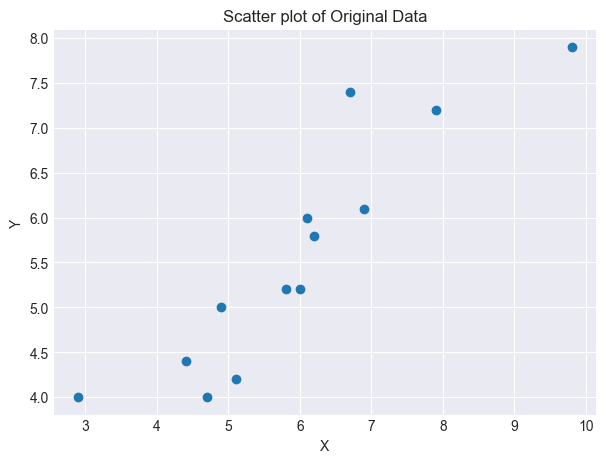

In [47]:
plt.figure(figsize=(7, 5))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter plot of Original Data")
plt.show()

---


### **Linear Regression Full Implementation**


#### **Step 1: Initialize Parameters**


Initialize parameters (theta_0 & theta_1) with random value or simply zero.<br>
Also choose the Learning rate.


In [48]:
theta_0 = 0.0
theta_1 = 0.0
lr = 0.01
m = len(y)

#### **Step 2: Implement the Hypothesis Function**


Use (theta_0 & theta_1) to predict the output

> **Note: you will need to iterate through all data points**


$$h_\theta(x) = \theta_0 + \theta_1 x$$


In [49]:
h_x = theta_0 + theta_1 * X


print("h(x):", h_x)

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


#### **Step 3: Calculate the Cost Function $J(\theta)$ (MSE)**


> <b>Note:</b> You better use either dot product or norm square of the error vector.


**Error Calculation**:
$$\text{Error} = h_x - y$$


In [50]:
error = h_x - y
print("Error Vector:\n", error)

Error Vector:
 [-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]


$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2$$


In [51]:
J_theta = np.sum(error**2) / (2 * m)
print("\nJ(θ):", J_theta)


J(θ): 16.305384479692318


$$J(\theta) = \frac{\| \text{Error} \|_2^2}{2m}$$

- $\| \text{Error} \|_2$ denotes the L2 norm of the error vector, which is equivalent to the square root of the sum of the squares of its elements.


In [52]:
J_theta = np.linalg.norm(error) ** 2 / (2 * m)
print("\nJ(θ):", J_theta)


J(θ): 16.305384479692314


$$J(\theta) = \frac{\text{E} \cdot \text{E}}{2m}$$


In [53]:
# J_theta = (error @ error) / (2 * m)
J_theta = np.dot(error, error) / (2 * m)
print("\nJ(θ):", J_theta)


J(θ): 16.305384479692318


#### **Step 4: Compute the Gradient**


Calculate the gradients for θ₀ and θ₁

> <b>Note:</b> You can use the error vector calculated in the previous step.


$$\frac{\partial}{\partial \theta_0} J(\boldsymbol{\theta}) = \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)$$

$$\frac{\partial}{\partial \theta_0} J(\boldsymbol{\theta}) = \frac{1}{m} \sum_{i=1}^{m} e^{(i)}$$

---

$$\frac{\partial}{\partial \theta_1} J(\boldsymbol{\theta}) = \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)x_1^{(i)}$$

$$\frac{\partial}{\partial \theta_1} J(\boldsymbol{\theta}) = \frac{1}{m} \sum_{i=1}^{m} (e^{(i)} x_1^{(i)})$$


In [54]:
d_theta_0 = (1 / m) * error.sum()
d_theta_1 = (1 / m) * (error @ X)


print("d(θ₀):", d_theta_0)
print("d(θ₁):", d_theta_1)

d(θ₀): -5.569230739769231
d(θ₁): -35.043846043215375


#### **Step 5: Update Parameters (Simultaneously)**


**Gradient Descent Function Update Rules**

$$\theta_0 := \theta_0 - \alpha \frac{\partial}{\partial \theta_0} J(\boldsymbol{\theta})$$

$$\theta_1 := \theta_1 - \alpha \frac{\partial}{\partial \theta_1} J(\boldsymbol{\theta})$$


In [55]:
theta_0 = theta_0 - (lr * d_theta_0)
theta_1 = theta_1 - (lr * d_theta_1)

print("Updated θ₀:", theta_0)
print("Updated θ₁:", theta_1)

Updated θ₀: 0.05569230739769231
Updated θ₁: 0.35043846043215376


#### **Step 6: Iterate Until Convergence**


Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.

The objective from this step is to combine all the previous steps and iterate untill you either achieve the maximum number of iterations or reach the minimum.


In [ ]:
theta_0 = 0
theta_1 = 0
lr = 0.01
m = len(y)
loss = []
max_iter = 100

for i in range(max_iter):
    print(f" Iteration {i+1} ".center(60, "—") + "\n")

    h_x = theta_0 + theta_1 * X
    print("h(x):", h_x, "\n")

    error = h_x - y
    print("Error Vector:\n", error, "\n")

    J_theta = (error @ error) / (2 * m)
    loss.append(J_theta)
    print("J(θ):", J_theta, "\n")

    d_theta_0 = (1 / m) * error.sum()
    d_theta_1 = (1 / m) * (error @ X)
    print("▽(θ₀):", d_theta_0)
    print("▽(θ₁):", d_theta_1, "\n")

    gv = np.array([[d_theta_0], [d_theta_1]])
    print("Gradient Vector:\n", gv, "\n")
    gv_norm = np.linalg.norm(gv)
    print("Gradient Vector Norm:", gv_norm, "\n")
    if gv_norm < 0.1:
        break

    theta_0 = theta_0 - (lr * d_theta_0)
    theta_1 = theta_1 - (lr * d_theta_1)
    print("New_θ₀: ", theta_0)
    print("New_θ₁: ", theta_1, "\n\n")

——————————————————————— Iteration 1 ————————————————————————

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 

Error Vector:
 [-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981] 

J(θ): 16.305384479692318 

▽(θ₀): -5.569230739769231
▽(θ₁): -35.043846043215375 

Gradient Vector:
 [[ -5.56923074]
 [-35.04384604]] 

Gradient Vector Norm: 35.483622652335995 

New_θ₀:  0.05569230739769231
New_θ₁:  0.35043846043215376 


——————————————————————— Iteration 2 ————————————————————————

h(x): [1.07196388 2.40362993 1.7728408  2.82415618 3.48998929 2.47371772
 2.19336688 2.2284107  2.15832307 1.84292842 1.702753   1.59762157
 2.08823544] 

Error Vector:
 [-2.92803612 -4.99637017 -3.2271592  -4.37584363 -4.41001081 -3.62628219
 -3.80663312 -3.5715895  -3.04167674 -2.35707139 -2.297247   -2.80237853
 -3.11176436] 

J(θ): 6.175608808043304 

▽(θ₀): -3.427081750033853
▽(θ₁): -21.338452630007847 



---


#### **Summary**


In [57]:
def gradient_descent(
    X, y, lr=0.1, max_iter=1000, loss_threshold=0.0001, gradient_threshold=0.001
):
    theta_0, theta_1 = 0, 0  # Initialize parameters
    m = len(y)
    loss_history = []

    for i in range(max_iter):
        # Compute predictions
        h_x = theta_0 + theta_1 * X

        # Calculate error
        error = h_x - y

        # Compute cost (Mean Squared Error)
        J_theta = np.dot(error, error) / (2 * m)
        loss_history.append(J_theta)

        # Check for convergence based on loss difference
        if i > 0 and np.abs(loss_history[i - 1] - loss_history[i]) < loss_threshold:
            print(f"Loss change convergence achieved at iteration {i + 1}")
            break

        # Compute gradients
        d_theta_0 = (1 / m) * error.sum()
        d_theta_1 = (1 / m) * (error @ X)

        # Compute gradient norm
        gradient_vector = np.array([d_theta_0, d_theta_1])
        gradient_norm = np.linalg.norm(gradient_vector)

        # Check for convergence based on gradient norm
        if gradient_norm < gradient_threshold:
            print(f"Gradient norm convergence achieved at iteration {i + 1}")
            break

        # Update parameters
        theta_0 -= lr * d_theta_0
        theta_1 -= lr * d_theta_1

    return theta_0, theta_1, loss_history


final_theta_0, final_theta_1, loss_history = gradient_descent(
    X, y, lr=0.001, max_iter=2000, loss_threshold=0.00001, gradient_threshold=0.01
)

print("Final θ₀:", final_theta_0)
print("Final θ₁:", final_theta_1)

Loss change convergence achieved at iteration 170
Final θ₀: 0.15509188910114532
Final θ₁: 0.8933464236228966


---


#### **Predict y values using the LR equation**

$$h_\theta(x) = \theta_0 + \theta_1 x$$


In [58]:
y_pred = final_theta_0 + final_theta_1 * X
print("h(x) = y_predict:\n", y_pred)
print("\ny_actual:\n", y)

h(x) = y_predict:
 [2.7457966  6.14051276 4.53248945 7.21252872 8.90988701 6.3191823
 5.60450499 5.69383954 5.51517043 4.71115856 4.35381991 4.08581624
 5.33650132]

y_actual:
 [4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]


#### **Visualize Results**


Plot LR equation output (fitted line) with the original data (scatter plot of X,y)


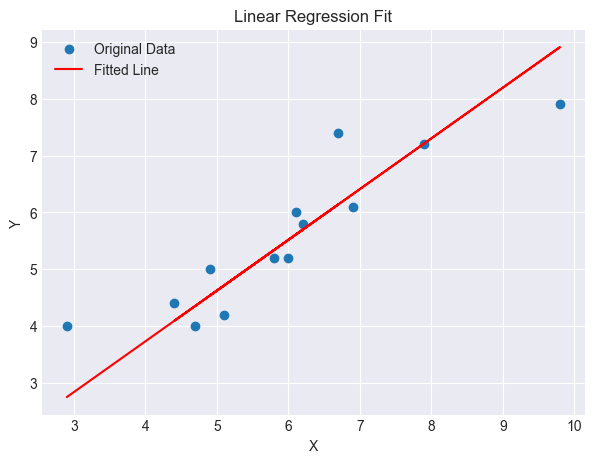

In [59]:
plt.figure(figsize=(7, 5))
plt.scatter(X, y, label="Original Data")
plt.plot(X, y_pred, color="red", label="Fitted Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

#### **Evaluate Model**


**Use R2 score to evaluate LR equation output**

https://en.wikipedia.org/wiki/Coefficient_of_determination


In [60]:
from sklearn.metrics import r2_score

r2 = r2_score(y, y_pred)
print("R2 Score:", r2)

R2 Score: 0.748317144299544


#### **Plot Loss Function**


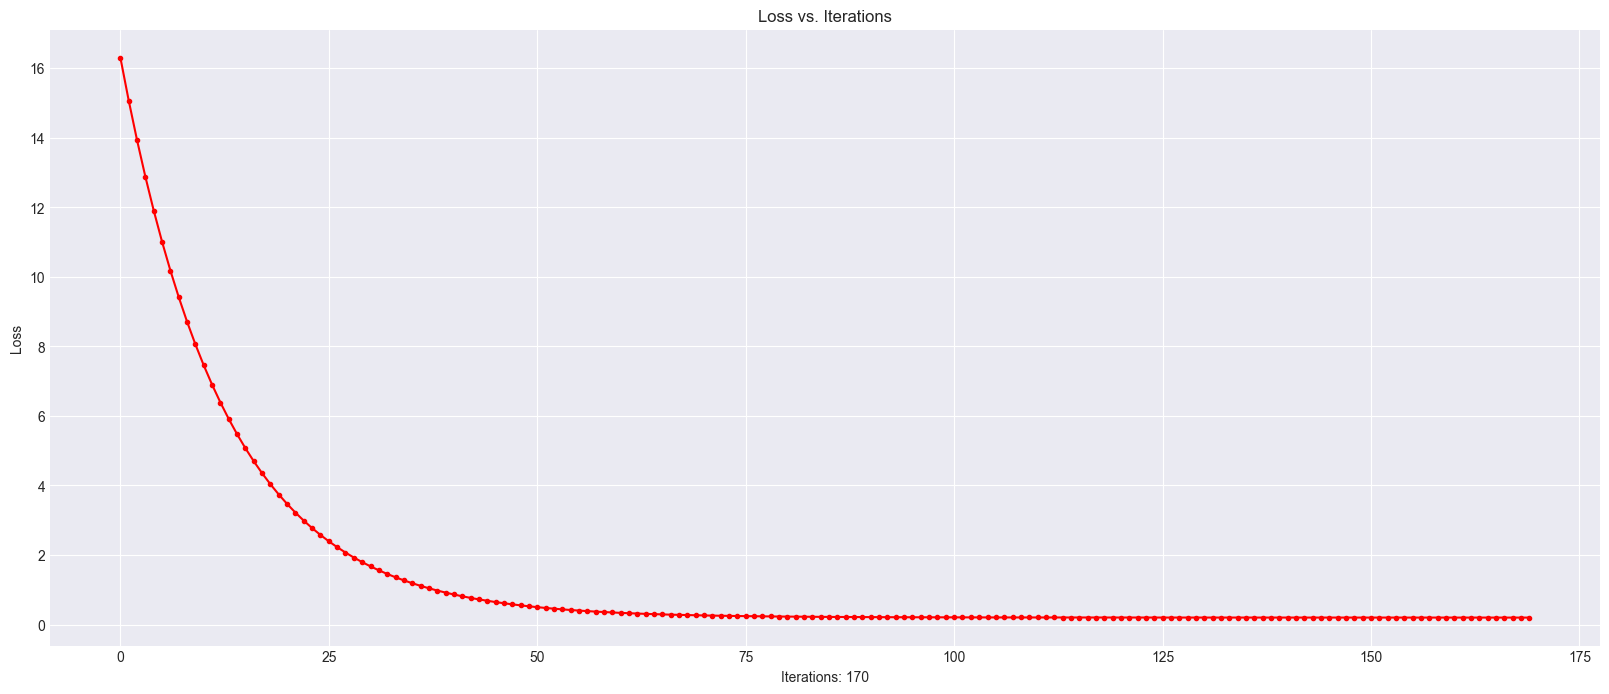

In [61]:
plt.figure(figsize=(20, 8))
plt.plot(loss_history, ".-r")
plt.title("Loss vs. Iterations")
plt.xlabel(f"Iterations: {len(loss_history)}")
plt.ylabel("Loss")
plt.show()

---
